### Import Modules

In [1]:
import sys
print(sys.executable)

c:\users\ranjeet walia\appdata\local\programs\python\python37\python.exe


In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

c:\users\ranjeet walia\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\ranjeet walia\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\ranjeet walia\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
tf.test.is_built_with_gpu_support()

True

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import pickle
import gensim
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.decomposition import PCA
from matplotlib import pyplot
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

### Variables


In [6]:
funny = []
nfunny = []
nfunny_small = []

### Sentence Extraction

In [7]:
with open('Raw_Data/funny.txt', 'rb') as file:
    funny = pickle.load(file)

In [8]:
print(len(funny))

46485


In [9]:
with open('Raw_Data/nfunny_small.txt', 'rb') as file:
    nfunny_small = pickle.load(file)

In [10]:
print(len(nfunny_small))

46485


### Word Processing

In [11]:
contractions = { 
"n't": "not",
"'ve": "have",
"'cause": "because",
"'ll": "will",
"'re":"are",
"'m":"am"
}
contractions_list = ["n't", "'ve", "'cause", "'ll", "'re","'m"]

In [12]:
def tokenise(text):
    token = [i.replace('\n' , ' ') for i in sent_tokenize(text)]
    words = [word_tokenize(x.strip()) for x in token]
    word = []
    for s in words:
        if len(s) > 0:
            word.append(i.lower().split() for i in s)
    l = []
    for i in words:
        for j in i:
            if j in contractions_list:
                j = contractions[j]
                l.append(j)
                continue
            l.append(j.lower().strip())
    return l            

In [13]:
def All_token(data):
    sentences = []
    for i in data:
        tokens = tokenise(i)
        sentences.append(tokens)
    return sentences

In [14]:
def RemoveStopWords(tokens):
    stop_words = set(stopwords.words('english')) 
    
    filtered_sentence = [] 
    for lis in tokens:
        w_lis = []
        for w in lis: 
            if w not in stop_words: 
                w_lis.append(w)
        filtered_sentence.append(w_lis)      
    return filtered_sentence

In [15]:
def CreateSentence(word_list):
    data = []
    for i in range(len(word_list)):
        every_word_list = word_list[i]
        sentence = ' '.join(word for word in every_word_list)
        data.append(sentence)
    return data

#### Funny Data

In [16]:
f_tokens = All_token(funny)
print(len(f_tokens))

46485


In [17]:
filter_f_token = RemoveStopWords(f_tokens)
print(len(filter_f_token))

46485


In [18]:
funny_data = CreateSentence(filter_f_token)
print(len(funny_data))

46485


In [19]:
with open('Model_Input/funny_data.txt', 'wb') as fp:
    pickle.dump(funny_data, fp)

###### Example

In [20]:
print(funny[1])

Review #189 - 2016

We arrived at Hertz at around 2:15 PM on Aug. 24th and was able to get our rental in about 20-25 minutes.  The pick up process is pretty simple.  You can either go to a customer service rep or use their self-serve kiosk, which is what I ended up doing.

The lady who was assisting me on the kiosk phone was pretty friendly, but she was doing a lot of up-sell so it was kind of bothersome.  I didn't need a bigger car than an economy size since there was only 2 of us.  I understand that they probably work off of commission, but sometimes it's unnecessary to try and convince you to get something that you don't need.

The return process was pretty quick and easy as well.  I ended up getting charged for an extra day because I brought the car back 1.5 hours after the pick up time since my flight didn't leave until 8 PM.  Too bad they don't have a "grace" period for regular customers.

Other than that the car was fine.  I didn't get anything fancy, just a KIA so nothing much 

In [21]:
print(len(f_tokens[1]))
print(f_tokens[1])

242
['review', '#', '189', '-', '2016', 'we', 'arrived', 'at', 'hertz', 'at', 'around', '2:15', 'pm', 'on', 'aug.', '24th', 'and', 'was', 'able', 'to', 'get', 'our', 'rental', 'in', 'about', '20-25', 'minutes', '.', 'the', 'pick', 'up', 'process', 'is', 'pretty', 'simple', '.', 'you', 'can', 'either', 'go', 'to', 'a', 'customer', 'service', 'rep', 'or', 'use', 'their', 'self-serve', 'kiosk', ',', 'which', 'is', 'what', 'i', 'ended', 'up', 'doing', '.', 'the', 'lady', 'who', 'was', 'assisting', 'me', 'on', 'the', 'kiosk', 'phone', 'was', 'pretty', 'friendly', ',', 'but', 'she', 'was', 'doing', 'a', 'lot', 'of', 'up-sell', 'so', 'it', 'was', 'kind', 'of', 'bothersome', '.', 'i', 'did', 'not', 'need', 'a', 'bigger', 'car', 'than', 'an', 'economy', 'size', 'since', 'there', 'was', 'only', '2', 'of', 'us', '.', 'i', 'understand', 'that', 'they', 'probably', 'work', 'off', 'of', 'commission', ',', 'but', 'sometimes', 'it', "'s", 'unnecessary', 'to', 'try', 'and', 'convince', 'you', 'to', 'ge

In [22]:
print(len(filter_f_token[1]))
print(filter_f_token[1])

123
['review', '#', '189', '-', '2016', 'arrived', 'hertz', 'around', '2:15', 'pm', 'aug.', '24th', 'able', 'get', 'rental', '20-25', 'minutes', '.', 'pick', 'process', 'pretty', 'simple', '.', 'either', 'go', 'customer', 'service', 'rep', 'use', 'self-serve', 'kiosk', ',', 'ended', '.', 'lady', 'assisting', 'kiosk', 'phone', 'pretty', 'friendly', ',', 'lot', 'up-sell', 'kind', 'bothersome', '.', 'need', 'bigger', 'car', 'economy', 'size', 'since', '2', 'us', '.', 'understand', 'probably', 'work', 'commission', ',', 'sometimes', "'s", 'unnecessary', 'try', 'convince', 'get', 'something', 'need', '.', 'return', 'process', 'pretty', 'quick', 'easy', 'well', '.', 'ended', 'getting', 'charged', 'extra', 'day', 'brought', 'car', 'back', '1.5', 'hours', 'pick', 'time', 'since', 'flight', 'leave', '8', 'pm', '.', 'bad', '``', 'grace', "''", 'period', 'regular', 'customers', '.', 'car', 'fine', '.', 'get', 'anything', 'fancy', ',', 'kia', 'nothing', 'much', 'write', '--', 'fact', 'clean', 'sme

In [23]:
print(len(set(filter_f_token[1])))
print(set(filter_f_token[1]))

96
{'lot', 'fine', 'smell', 'customers', 'try', 'rental', "''", 'service', '189', 'flight', 'able', 'sometimes', 'kia', 'period', 'pick', 'convince', 'kind', 'hours', 'anything', 'understand', "'s", 'clean', 'encountered', '2', 'use', 'bigger', 'up-sell', ',', 'time', '#', 'kiosk', 'rentals', 'like', '2:15', 'either', 'something', 'process', 'lady', '24th', 'aug.', '.', 'back', 'review', '-', 'go', 'minutes', 'simple', 'size', 'hertz', 'friendly', 'rep', 'leave', '1.5', 'arrived', 'ended', 'pretty', 'quick', 'much', 'elsewhere', 'commission', 'charged', 'brought', '``', 'bad', 'assisting', 'unnecessary', 'easy', 'phone', '20-25', 'get', 'us', 'day', 'write', 'pm', 'getting', 'around', 'car', 'extra', 'nothing', 'since', '--', 'well', 'regular', 'work', 'return', 'self-serve', 'probably', 'grace', '2016', 'customer', 'economy', 'bothersome', 'need', 'fact', 'fancy', '8'}


In [24]:
print(funny_data[1])

review # 189 - 2016 arrived hertz around 2:15 pm aug. 24th able get rental 20-25 minutes . pick process pretty simple . either go customer service rep use self-serve kiosk , ended . lady assisting kiosk phone pretty friendly , lot up-sell kind bothersome . need bigger car economy size since 2 us . understand probably work commission , sometimes 's unnecessary try convince get something need . return process pretty quick easy well . ended getting charged extra day brought car back 1.5 hours pick time since flight leave 8 pm . bad `` grace '' period regular customers . car fine . get anything fancy , kia nothing much write -- fact clean smell bad like rentals encountered elsewhere .


#### Non-Funny Data

In [25]:
nf_tokens = All_token(nfunny_small)
print(len(nf_tokens))

46485


In [26]:
filter_nf_token = RemoveStopWords(nf_tokens)
print(len(filter_nf_token))

46485


In [27]:
nfunny_data = CreateSentence(filter_nf_token)
print(len(nfunny_data))

46485


In [28]:
with open('Model_Input/nfunny_data.txt', 'wb') as fo:
    pickle.dump(nfunny_data, fo)

###### Example

In [29]:
print(nfunny_small[1])

I *adore* Travis at the Hard Rock's new Kelly Cardenas Salon!  I'm always a fan of a great blowout and no stranger to the chains that offer this service; however, Travis has taken the flawless blowout to a whole new level!  

Travis's greets you with his perfectly green swoosh in his otherwise perfectly styled black hair and a Vegas-worthy rockstar outfit.  Next comes the most relaxing and incredible shampoo -- where you get a full head message that could cure even the very worst migraine in minutes --- and the scented shampoo room.  Travis has freakishly strong fingers (in a good way) and use the perfect amount of pressure.  That was superb!  Then starts the glorious blowout... where not one, not two, but THREE people were involved in doing the best round-brush action my hair has ever seen.  The team of stylists clearly gets along extremely well, as it's evident from the way they talk to and help one another that it's really genuine and not some corporate requirement.  It was so much 

In [30]:
print(len(nf_tokens[1]))
print(nf_tokens[1])

310
['i', '*adore*', 'travis', 'at', 'the', 'hard', 'rock', "'s", 'new', 'kelly', 'cardenas', 'salon', '!', 'i', 'am', 'always', 'a', 'fan', 'of', 'a', 'great', 'blowout', 'and', 'no', 'stranger', 'to', 'the', 'chains', 'that', 'offer', 'this', 'service', ';', 'however', ',', 'travis', 'has', 'taken', 'the', 'flawless', 'blowout', 'to', 'a', 'whole', 'new', 'level', '!', 'travis', "'s", 'greets', 'you', 'with', 'his', 'perfectly', 'green', 'swoosh', 'in', 'his', 'otherwise', 'perfectly', 'styled', 'black', 'hair', 'and', 'a', 'vegas-worthy', 'rockstar', 'outfit', '.', 'next', 'comes', 'the', 'most', 'relaxing', 'and', 'incredible', 'shampoo', '--', 'where', 'you', 'get', 'a', 'full', 'head', 'message', 'that', 'could', 'cure', 'even', 'the', 'very', 'worst', 'migraine', 'in', 'minutes', '--', '-', 'and', 'the', 'scented', 'shampoo', 'room', '.', 'travis', 'has', 'freakishly', 'strong', 'fingers', '(', 'in', 'a', 'good', 'way', ')', 'and', 'use', 'the', 'perfect', 'amount', 'of', 'press

In [31]:
print(len(filter_nf_token[1]))
print(filter_nf_token[1])

188
['*adore*', 'travis', 'hard', 'rock', "'s", 'new', 'kelly', 'cardenas', 'salon', '!', 'always', 'fan', 'great', 'blowout', 'stranger', 'chains', 'offer', 'service', ';', 'however', ',', 'travis', 'taken', 'flawless', 'blowout', 'whole', 'new', 'level', '!', 'travis', "'s", 'greets', 'perfectly', 'green', 'swoosh', 'otherwise', 'perfectly', 'styled', 'black', 'hair', 'vegas-worthy', 'rockstar', 'outfit', '.', 'next', 'comes', 'relaxing', 'incredible', 'shampoo', '--', 'get', 'full', 'head', 'message', 'could', 'cure', 'even', 'worst', 'migraine', 'minutes', '--', '-', 'scented', 'shampoo', 'room', '.', 'travis', 'freakishly', 'strong', 'fingers', '(', 'good', 'way', ')', 'use', 'perfect', 'amount', 'pressure', '.', 'superb', '!', 'starts', 'glorious', 'blowout', '...', 'one', ',', 'two', ',', 'three', 'people', 'involved', 'best', 'round-brush', 'action', 'hair', 'ever', 'seen', '.', 'team', 'stylists', 'clearly', 'gets', 'along', 'extremely', 'well', ',', "'s", 'evident', 'way', 't

In [32]:
print(nfunny_data[1])

*adore* travis hard rock 's new kelly cardenas salon ! always fan great blowout stranger chains offer service ; however , travis taken flawless blowout whole new level ! travis 's greets perfectly green swoosh otherwise perfectly styled black hair vegas-worthy rockstar outfit . next comes relaxing incredible shampoo -- get full head message could cure even worst migraine minutes -- - scented shampoo room . travis freakishly strong fingers ( good way ) use perfect amount pressure . superb ! starts glorious blowout ... one , two , three people involved best round-brush action hair ever seen . team stylists clearly gets along extremely well , 's evident way talk help one another 's really genuine corporate requirement . much fun ! next travis started flat iron . way flipped wrist get volume around without over-doing making look like texas pagent girl admirable . 's also worth noting fry hair -- something happen less skilled stylists . end blowout & style hair perfectly bouncey looked terr

In [33]:
print(len(set(filter_nf_token[1])))
print(set(filter_nf_token[1]))

142
{'texas', 'end', '&', 'every', 'awesome', 'travis', 'over-doing', 'level', 'flawless', 'strong', 'whole', 'migraine', 'service', '!', 'chains', 'scented', 'great', 'perfectly', 'glorious', 'room', 'stranger', 'hard', 'another', 'gets', 'action', 'ever', 'evident', 'fun', 'also', 'style', 'starts', 'fan', "'s", 'thing', 'could', 'head', 'way', 'see', 'extremely', 'look', 'clearly', 'use', 'iron', 'two', 'next', 'rockstar', ',', 'time', 'beauuuutiful', 'black', '(', '...', 'superb', 'started', 'like', 'comes', 'shampoo', 'fingers', 'message', 'pagent', 'even', 'always', 'hair', 'something', 'less', 'green', 'flipped', 'single', '.', 'one', 'looked', 'days', 'stylists', 'seen', 'lasted', 'greets', '-', 'vegas-worthy', 'vegas', 'rock', 'team', 'fry', 'genuine', ';', 'minutes', 'pressure', 'bouncey', 'good', 'cardenas', 'noting', ')', 'amount', 'however', 'relaxing', 'talk', 'skilled', 'terrific', 'better', 'much', 'full', 'blowout', 'help', '*adore*', 'outfit', 'happen', 'admirable', '

### Word 2 Vector

In [34]:
final_f_list = filter_f_token + filter_nf_token
print(len(final_f_list))

92970


In [35]:
num_features = 100    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

In [36]:
w2v_model = gensim.models.Word2Vec(final_f_list, workers=num_workers,size=num_features, min_count = min_word_count, window = context, sample = downsampling)

In [37]:
words = list(w2v_model.wv.vocab)
print(len(words))

12928


In [38]:
print(words)

['took', 'kids', 'hang', 'one', 'fine', '72', 'degree', 'sunny', 'saturday', 'february', '.', 'going', 'bridge', ',', 'coming', 'casino', 'cant', 'miss', 'nice', 'view', 'waterfall', 'park', 'bad', 'playground', 'things', 'vouch', 'little', 'area', 'decent', 'amount', 'equipment', 'swings', 'slides', 'tables', 'benches', 'like', 'soft', 'material', 'use', 'built', 'also', 'sand', 'lot', 'dinosaur', 'bones', 'props', 'day', 'went', 'packed', 'running', 'actually', 'waiting', 'get', '!', 'decided', 'walk', 'around', 'check', 'rest', 'see', 'ducks', 'everywhere', 'especially', 'pond', 'unfortunately', '``', 'stuff', "''", 'ends', 'paths', 'walking', 'green', 'duck', 'crap', 'brings', 'question', 'kind', 'spray', 'force', 'field', '?', 'anywhere', 'im', 'curious', 'many', 'people', 'would', 'spread', 'blanket', 'picnic', 'grass', 'well', 'review', 'starting', 'grossed', 'thinking', 'carefully', 'trying', 'step', 'car', 'made', 'mental', 'note', 'make', 'sure', 'mention', 'saw', 'hesitate',

In [39]:
print(w2v_model.similarity('sauce','modern'))

-0.18768346


c:\users\ranjeet walia\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


In [40]:
print(w2v_model['?'])

[ 0.30663392  2.1334596   1.0261009  -0.23228057  4.051508    1.6616862
 -0.6196695  -0.7396845   1.0992798   0.23915386 -3.0315828   1.3711885
 -2.147234    0.85860676 -1.0330967  -0.7435092  -0.5228535  -1.2915766
 -2.1762702   0.9041815   1.228585    3.4472296  -1.5085216   1.2394153
  1.5233995  -1.8114585  -2.3395958   2.4198728   0.3895707  -0.25018182
  2.42816     1.7234545   0.8975407  -0.1623027   0.34652779  3.1169002
  0.39399087 -0.49084008 -0.40882224  1.1627856   1.5664586  -3.0926545
  2.7088773   2.083405    0.5429108   0.40968588 -0.8359106   0.32677647
 -1.3888913   0.3854501  -1.433739   -1.4985095   0.1565657  -2.364063
  0.09824772  0.8858731   2.0276535  -1.393493    1.6826576   1.9487572
  1.7788614   0.7117347  -0.7607441   1.3123425  -3.5731845  -1.3884747
 -0.43426517 -2.935163    0.49510944 -0.83417934  1.1948016  -1.3285553
  1.5926557  -0.42121112 -0.54302543  0.6376222   1.0403703   0.72004485
  0.5533011  -5.555963   -1.8838735  -1.0446517   0.21993178  

c:\users\ranjeet walia\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [41]:
result = w2v_model.most_similar(positive=['queen', 'man'], negative=['king'], topn=1)
print(result)

[('woman', 0.6484012603759766)]


c:\users\ranjeet walia\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [45]:
(w2v_model.most_similar('?'))

c:\users\ranjeet walia\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('huh', 0.845390796661377),
 ('wtf', 0.8147647380828857),
 ('kidding', 0.7785767316818237),
 ('heck', 0.7432834506034851),
 ('uh', 0.7282010316848755),
 ('um', 0.7199268341064453),
 ('nope', 0.7139737606048584),
 ("c'mon", 0.7025094032287598),
 ('mean', 0.6861091256141663),
 ('hell', 0.6848318576812744)]

In [46]:
(w2v_model.most_similar('!'))

c:\users\ranjeet walia\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('omg', 0.6858022212982178),
 ('soo', 0.6136181354522705),
 ('sooooo', 0.6118803024291992),
 ('freaking', 0.5957902669906616),
 ('lol', 0.5956805944442749),
 ('sooo', 0.5951738357543945),
 ('soooo', 0.5804808735847473),
 ('dang', 0.5658035278320312),
 ('awesome', 0.56219482421875),
 ('haha', 0.5603320598602295)]

In [47]:
(w2v_model.most_similar('.'))

c:\users\ranjeet walia\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(',', 0.7060431241989136),
 ('really', 0.579757809638977),
 ('although', 0.4832914471626282),
 ('also', 0.4790697395801544),
 ('actually', 0.4711456894874573),
 ('food', 0.4687252640724182),
 ('good', 0.4660904109477997),
 ('since', 0.4620200991630554),
 ('seemed', 0.461245059967041),
 ('would', 0.46079546213150024)]

In [48]:
w2v_model.save("word2vec.model")

##### Principal Component Analysis or PCA

In [49]:
Embedding_index = w2v_model[words]

c:\users\ranjeet walia\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [50]:
pca = PCA(n_components=2)
result = pca.fit_transform(Embedding_index)

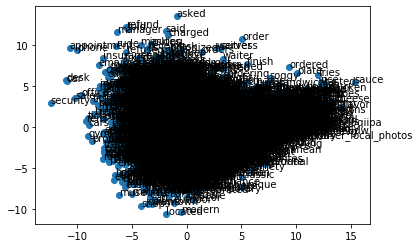

In [51]:
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

### Model Inputs

In [52]:
funny_data = []
nfunny_data = []

In [53]:
with open('Model_Input/funny_data.txt', 'rb') as file:
    funny_data = pickle.load(file)
print(len(funny_data))

46485


In [54]:
with open('Model_Input/nfunny_data.txt', 'rb') as file:
    nfunny_data = pickle.load(file)
print(len(nfunny_data))

46485


In [55]:
w2v_model = gensim.models.Word2Vec.load("word2vec.model")
words = list(w2v_model.wv.vocab)
Embedding_index = w2v_model[words]
print(Embedding_index.shape)

(12928, 100)


c:\users\ranjeet walia\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [57]:
train_joke= funny_data + nfunny_data
print(len(train_joke))

92970


In [58]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_joke)
encoded_joke = tokenizer.texts_to_sequences(train_joke)

In [59]:
print(len(encoded_joke[1]))

109


In [60]:
print(encoded_joke[1])

[139, 30248, 2583, 396, 6655, 57, 35, 338, 935, 12855, 12495, 298, 7, 1742, 262, 626, 93, 391, 889, 52, 526, 319, 13, 166, 14, 3778, 209, 1030, 470, 4522, 423, 457, 8252, 4522, 377, 52, 65, 85, 1160, 844, 198, 14318, 106, 1230, 175, 5726, 373, 70, 35, 18, 637, 170, 112, 7046, 598, 1, 3946, 38, 4972, 7, 80, 106, 399, 889, 52, 336, 384, 20, 423, 168, 1050, 304, 53, 370, 175, 12, 92, 30, 241, 391, 9, 70, 989, 353, 345, 935, 104, 4250, 8, 2507, 431, 380, 175, 408, 7, 186, 982, 13064, 162, 27, 866, 363, 151, 939, 104, 2, 8001, 2886, 1255]


In [61]:
print(train_joke[1])

review # 189 - 2016 arrived hertz around 2:15 pm aug. 24th able get rental 20-25 minutes . pick process pretty simple . either go customer service rep use self-serve kiosk , ended . lady assisting kiosk phone pretty friendly , lot up-sell kind bothersome . need bigger car economy size since 2 us . understand probably work commission , sometimes 's unnecessary try convince get something need . return process pretty quick easy well . ended getting charged extra day brought car back 1.5 hours pick time since flight leave 8 pm . bad `` grace '' period regular customers . car fine . get anything fancy , kia nothing much write -- fact clean smell bad like rentals encountered elsewhere .


In [62]:
max_length = max([len(s.split()) for s in train_joke])
print(max_length)

888


In [63]:
X = pad_sequences(encoded_joke, maxlen=max_length)
print(len(X))

92970


In [64]:
Y = np.array([1 for _ in range(len(funny))] + [0 for _ in range(len(nfunny_small))])
print(len(Y))

92970


In [65]:
print(train_joke[1])

review # 189 - 2016 arrived hertz around 2:15 pm aug. 24th able get rental 20-25 minutes . pick process pretty simple . either go customer service rep use self-serve kiosk , ended . lady assisting kiosk phone pretty friendly , lot up-sell kind bothersome . need bigger car economy size since 2 us . understand probably work commission , sometimes 's unnecessary try convince get something need . return process pretty quick easy well . ended getting charged extra day brought car back 1.5 hours pick time since flight leave 8 pm . bad `` grace '' period regular customers . car fine . get anything fancy , kia nothing much write -- fact clean smell bad like rentals encountered elsewhere .


In [66]:
print(X[1])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [67]:
print(Y[1])

1


In [68]:
X_train, X_text, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [69]:
print(X_train.shape, X_text.shape, Y_train.shape, Y_test.shape)

(74376, 888) (18594, 888) (74376,) (18594,)


In [70]:
Embedding_index.shape

(12928, 100)

### Model

In [71]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [72]:
model_joke = Sequential()
model_joke.add(Embedding(Embedding_index.shape[0], Embedding_index.shape[1], weights=[Embedding_index], input_length=max_length, trainable=False))
model_joke.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model_joke.add(Conv1D(filters=64, kernel_size=8, activation='relu'))
model_joke.add(MaxPooling1D(pool_size=2))
model_joke.add(Flatten())
model_joke.add(Dense(256, activation='relu'))
model_joke.add(Dense(1, activation='sigmoid'))

In [73]:
model_joke.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 888, 100)          1292800   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 881, 32)           25632     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 874, 64)           16448     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 437, 64)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 27968)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               7160064   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [74]:
model_joke.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
history = model_joke.fit(X_train, Y_train, validation_data=(X_text, Y_test), epochs=5, batch_size=32, verbose=2)

Train on 74376 samples, validate on 18594 samples
Epoch 1/5
 - 57s - loss: 0.5364 - accuracy: 0.7538 - val_loss: 0.5238 - val_accuracy: 0.7687
Epoch 2/5
 - 55s - loss: 0.4973 - accuracy: 0.7663 - val_loss: 0.4955 - val_accuracy: 0.7677
Epoch 3/5
 - 55s - loss: 0.4768 - accuracy: 0.7756 - val_loss: 0.4932 - val_accuracy: 0.7731
Epoch 4/5
 - 55s - loss: 0.4540 - accuracy: 0.7878 - val_loss: 0.5179 - val_accuracy: 0.7530
Epoch 5/5
 - 55s - loss: 0.4337 - accuracy: 0.8021 - val_loss: 0.5175 - val_accuracy: 0.7582


In [76]:
loss, acc = model_joke.evaluate(X_text, Y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))
print('Test Loss: %f' % (np.exp(loss)))

Test Accuracy: 75.820160
Test Loss: 1.677822


In [77]:
Y_pred = model_joke.predict_classes(X_text)
for i in range(20):
    print('Actual = {}:, Predicted = {}'.format(Y_test[i], Y_pred[i]))

Actual = 1:, Predicted = [1]
Actual = 1:, Predicted = [1]
Actual = 1:, Predicted = [1]
Actual = 1:, Predicted = [1]
Actual = 0:, Predicted = [1]
Actual = 1:, Predicted = [1]
Actual = 1:, Predicted = [1]
Actual = 1:, Predicted = [1]
Actual = 0:, Predicted = [0]
Actual = 1:, Predicted = [1]
Actual = 0:, Predicted = [1]
Actual = 1:, Predicted = [1]
Actual = 0:, Predicted = [1]
Actual = 0:, Predicted = [1]
Actual = 0:, Predicted = [0]
Actual = 1:, Predicted = [0]
Actual = 0:, Predicted = [1]
Actual = 0:, Predicted = [1]
Actual = 1:, Predicted = [1]
Actual = 0:, Predicted = [1]


In [78]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, f1_score, fbeta_score

In [79]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy : ".format(acc))

0.7582015703990534


In [80]:
error = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error : ".format(error))

0.24179842960094655


In [81]:
error = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error : ".format(error))

0.24179842960094655


In [82]:
score = r2_score(Y_test, Y_pred)
print("R2 Score : ".format(score))

0.03271961892691122


In [83]:
score = f1_score(Y_test, Y_pred)
print("F1 Score : ".format(score))

0.7579151410725824


In [84]:
score = fbeta_score(Y_test, Y_pred, beta = 0.5)
print("F-Beta Score : ".format(score))

0.7627945288622028


##### summarize history for accuracy

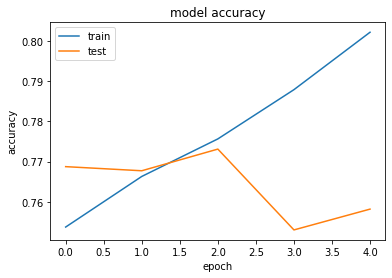

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')	
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### summarize history for loss

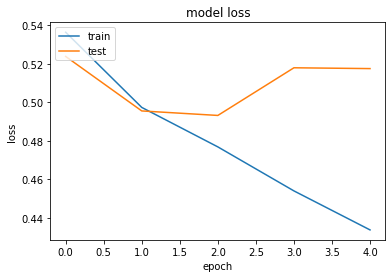

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()